In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Creating Tibbles

To coerce a dataframe to a tibble, use as_tibble().

In [2]:
head(as_tibble(iris))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Create a new tibble from individual vectors with tibble().

In [3]:
tibble(
    x = 1:5,
    y = 1,
    z = (x + y^3) * 3
)

x,y,z
1,1,6
2,1,9
3,1,12
4,1,15
5,1,18


Tibble does much less than data.frame():
* never changes the type of inputs (eg. never converts stringd to factors).
* never changes names of variables.
* never creates row names.

Tibble can also have column names that are nonsyntactic. (Note <- To refer to these variables, surround them with backticks, `)

In [4]:
(tb <- tibble(
    `:)` = "smile",
    ` ` = 'space',
    `2000` = 'number'
))

:),,2000
smile,space,number


Note <- Backticks are needed when working with these variables in other packages, like ggplot2, dplyr, and tidyr.

Another way to create tibble is using tribble() (short for transposed tibble). tribble is customised for data entry in code: column headings are defined by formulas(i.e. start with ~), and entries are separated by commas.

In [5]:
tribble(
    ~x, ~y, ~z,
   #---/---/----/
    "a", 2, 3.6,
    'b', 3, 5.4,
    'c', 4, 3.1
)

x,y,z
a,2,3.6
b,3,5.4
c,4,3.1


# Tibbles versus data.frame

The two major differences between tibble and data.frame: 
* Printing 
* Subsetting

# Printing

Printing tibbles shows only first 10 rows and all columns that fit on screen. In addition to its name, each column also reports its type (a feature from str()).

In [6]:
head(tibble(
    a = lubridate::now() + runif(1e3) * 86400,
    b = lubridate::today() + runif(1e3) * 30,
    c = 1:1e3,
    d = runif(1e3),
    e = sample(letters, 1e3, replace = TRUE)
))

a,b,c,d,e
2021-06-08 21:00:16,2021-06-28,1,0.9698232,z
2021-06-09 19:02:09,2021-06-21,2,0.9759702,k
2021-06-09 13:44:31,2021-07-06,3,0.8637972,v
2021-06-09 14:23:41,2021-06-26,4,0.2034292,y
2021-06-08 23:41:31,2021-06-24,5,0.6050637,b
2021-06-09 16:30:30,2021-07-07,6,0.4901938,d


Note <- The output above will be exactly as mentioned above, when the code is run in the R-Studio.

If more output than default display is needed, few options can help.

* Explicitly print() the data frame and control the number of rows (n) and width of display (width = Inf, will display all columns).

In [7]:
#install.packages('nycflights13')

In [8]:
nycflights13::flights %>% 
    print(n = 10, width = Inf)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

Control the default print behaviour by setting options:
* options(tibble.print_max = n, tibble.print_min = m) <- If more than m rows in the dataset, then prints only n rows. Use options(dplyr.print_min = Inf) to always show all rows.
* Use options(tibble.width = Inf) to always print all columns, regardless of width of screen.

Note <- For complete list of options, use package?tibble.

Final option is to use View() (R-Studio's built-in data viewer) to get a scrolling view of complete dataset. Its often used at the end of a long chain of manipulations.

# Subsetting

In [9]:
(df <- tibble(
    x = runif(5),
    y = rnorm(5)
))

# Extract by name
df$x
df[['x']]

# Extract by position
df[[1]]

x,y
0.08820877,-0.17638754
0.39196666,-0.86233238
0.65922066,0.74048587
0.81762653,-1.24533886
0.03732262,0.07595553


[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

To use these operators in a pipe, use the special character as shown below.

In [10]:
df %>% .$x

[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

In [11]:
df %>% .[['x']]

[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

In [12]:
df %>% .[[1]]

[1] 0.08820877 0.39196666 0.65922066 0.81762653 0.03732262

Compared to data.frame, tibbles are more strict:
* They never do partial matching.
* They will generate an warning if the column you are tring to access does not exist.

# Interacting with Older Code

Some older functions don't work with tibble, if any such function is encountered use as.data.frame() to turn tibble back to a data.frame

In [13]:
class(as.data.frame(tb))

[1] "data.frame"

The main reason for some older function not working with tibbles is that, with base R data-frames, subsetting functions sometimes return a data-frame and sometimes a vector. But with tibbles, subsetting funtions always return a tibble. dplyr::filter() and dplyr::select() allows to solve this issue with a cleaner code. 

In [14]:
# Check if an object is tibble or not.
is_tibble(mtcars)

# Check the class of an object.
class(mtcars)

[1] FALSE

[1] "data.frame"

In [15]:
df <- data.frame(abc = 1, xyz = 'a')
df$x
df[, 'xyz']
df[, c('abc', 'xyz')]

[1] a
Levels: a

[1] a
Levels: a

abc,xyz
1,a


In [16]:
tb <- as_tibble(df)
tb$x
tb[, 'xyz']
tb[, c('abc', 'xyz')]

Warning message:
"Unknown or uninitialised column: 'x'."

NULL

xyz
a


abc,xyz
1,a


1,2
1,2.574568
2,5.606432
3,5.827233
4,6.231066
5,10.447741
6,12.233975
7,12.834640
8,13.554780
9,19.184517
10,19.535448


[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

1,2,3
1,2.574568,2.574568
2,5.606432,2.803216
3,5.827233,1.942411
4,6.231066,1.557766
5,10.447741,2.089548
6,12.233975,2.038996
7,12.834640,1.833520
8,13.554780,1.694348
9,19.184517,2.131613
10,19.535448,1.953545


one,two,three
1,2.574568,2.574568
2,5.606432,2.803216
3,5.827233,1.942411
4,6.231066,1.557766
5,10.447741,2.089548
6,12.233975,2.038996
7,12.834640,1.833520
8,13.554780,1.694348
9,19.184517,2.131613
10,19.535448,1.953545


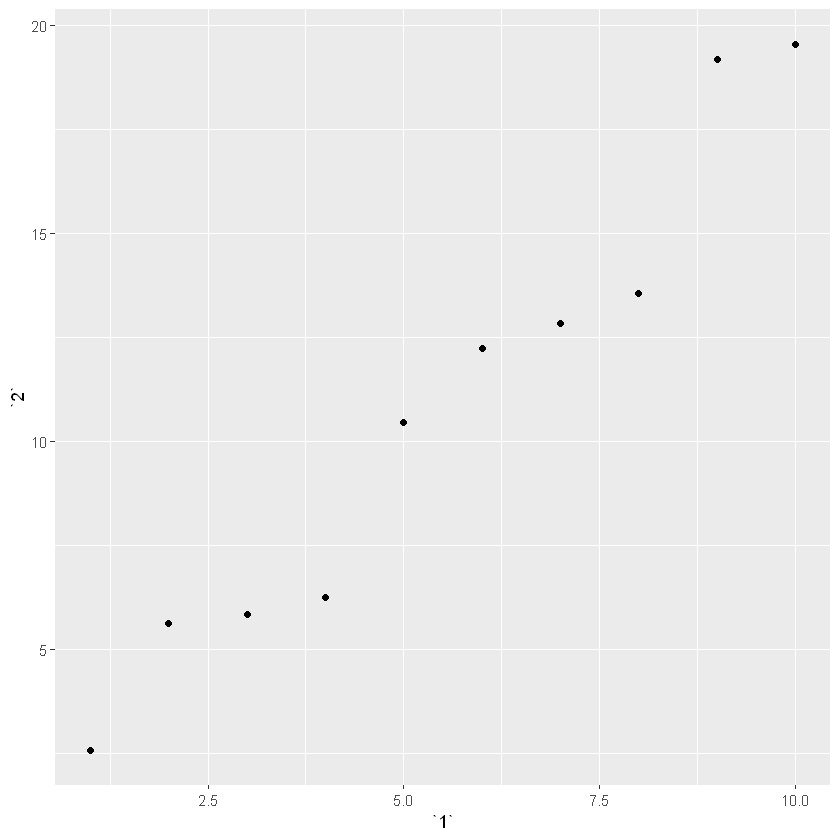

In [17]:
(annoying <- tibble(
    `1` = 1:10,
    `2` = `1` * 2 + rnorm(length(`1`))
))

# Extract the variable called `1`
annoying$`1`
annoying[['1']]

# Plotting a scatterplot of `1` versus `2`
ggplot(annoying, aes(`1`, `2`)) +
    geom_point()

# Create new column `3` = `2` / `1`
(annoying <- mutate(annoying, `3` = `2` / `1`))
#annoying[['3']] <- annoying[['2']] / annoying[['1']]

# Rename columns to One, Two, Three
(rename(annoying, 'one' = `1`, 'two' = `2`, 'three' = `3`))

In [18]:
# Use of tibble::enframe() function
enframe(1:3)
enframe(c(a = 5, b = 7))
enframe(list(one = 1, two = 2:3, three = 4:6))

# Use of tibble::deframe() function
deframe(enframe(1:3))
deframe(tibble(a = 1:3))
deframe(tibble(a = as.list(1:3)))

name,value
1,1
2,2
3,3


name,value
a,5
b,7


name,value
one,1
two,"2, 3"
three,"4, 5, 6"


1 2 3 
1 2 3

[1] 1 2 3

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3